In [7]:
import re
import os
import ast
import matplotlib.pyplot as plt
from collections import defaultdict


# Define the range of x and y
x_range = range(0, 8)  # x in [0, 7]
y_range = range(1, 101)  # y in [1, 100]

# Regular expression to match 'avr_accuracy'
pattern = r"'avr_accuracy': \[(.*?)\]"

# Dictionary to store results
accuracies = {}
setting_accuracies = defaultdict(list)

# Iterate through the files
for x in x_range:
    for y in y_range:
        file_path = f"setting_{x}_run_{y}.json"

        if os.path.exists(file_path):
            with open(file_path, "r") as file:
                content = file.read()

            # Extract accuracy values
            match = re.findall(pattern, content, re.DOTALL)
            if match:
                accuracy_str = match[0]
                # Convert the string into a Python list
                accuracy_list = ast.literal_eval(f"[{accuracy_str}]")
                setting_accuracies[x].append(accuracy_list)
        else:
            print(f"File {file_path} not found.")

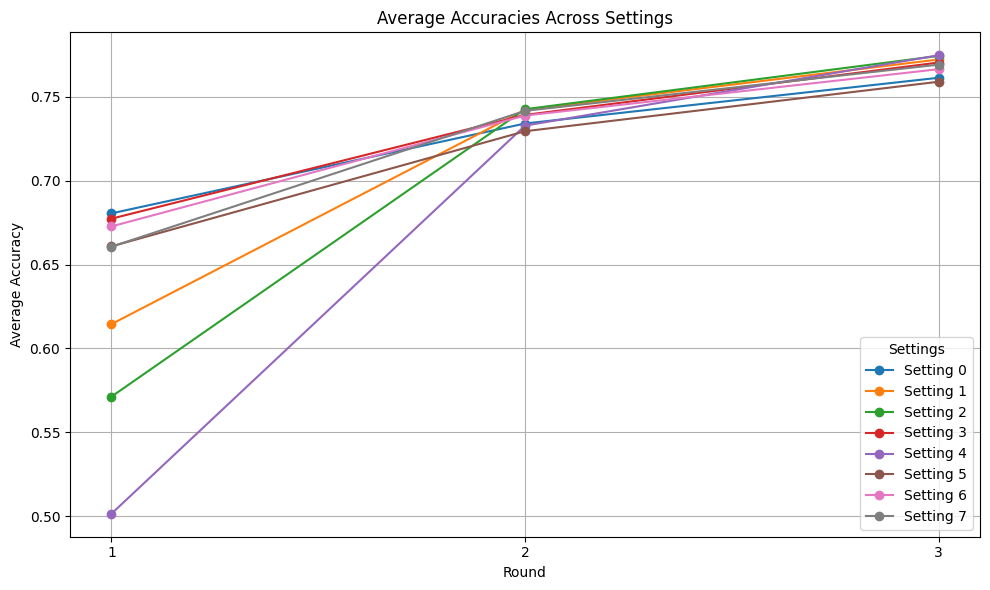

In [12]:
# Plot all settings on the same graph
plt.figure(figsize=(10, 6))
avg_accuracies_dic = {}
for x, accuracies in setting_accuracies.items():
    # Prepare data for plotting
    rounds = len(accuracies[0]) if accuracies else 0
    avg_accuracies = [0] * rounds  # Initialize average accuracies for each round

    for acc_list in accuracies:
        for i, (_, acc) in enumerate(acc_list):
            avg_accuracies[i] += acc  # Sum accuracies across runs

    # Compute averages
    num_runs = len(accuracies)
    avg_accuracies_dic[x] = [acc / num_runs for acc in avg_accuracies] if num_runs > 0 else avg_accuracies

    # Plotting for the current setting
    plt.plot(
        range(1, rounds + 1),
        avg_accuracies_dic[x],
        marker='o',
        label=f"Setting {x}"
    )

# Customize the plot
plt.title("Average Accuracies Across Settings")
plt.xlabel("Round")
plt.ylabel("Average Accuracy")
plt.xticks(range(1, rounds + 1))
plt.grid(True)
plt.legend(title="Settings")
plt.tight_layout()
plt.show()

In [13]:
avg_accuracies_dic

{0: [0.6805207465422428, 0.7341268121979665, 0.7614055990668227],
 1: [0.6144575904015999, 0.742260456590568, 0.7723129478420273],
 2: [0.5712147975337443, 0.7426528911848023, 0.7744425929011841],
 3: [0.6773546075654057, 0.7392484585902346, 0.7704915847358781],
 4: [0.5013547742042994, 0.7328545242459583, 0.7748258623562749],
 5: [0.6608406932177975, 0.7295134144309274, 0.7590359940010002],
 6: [0.6727412097983675, 0.7388601899683382, 0.7665255790701556],
 7: [0.6606540576570579, 0.7416788868521911, 0.7692409598400275]}

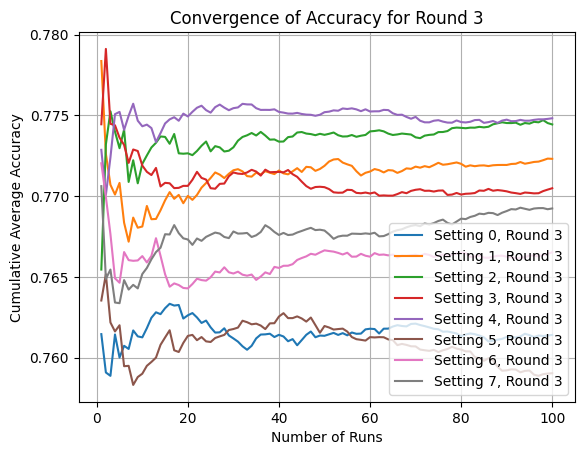

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Loop through settings and extract cumulative averages for round 3
for x, accuracies in setting_accuracies.items():
    num_runs = len(accuracies)
    round_idx = 2  # Index for round 3 (0-based indexing)

    # Calculate cumulative average for round 3
    cumulative_avg = [
        np.mean([run[round_idx][1] for run in accuracies[:n]])
        for n in range(1, num_runs + 1)
    ]

    # Plot the cumulative average for round 3
    plt.plot(
        range(1, num_runs + 1),
        cumulative_avg,
        label=f"Setting {x}, Round 3",
    )

# Add labels, legend, and display the plot
plt.xlabel("Number of Runs")
plt.ylabel("Cumulative Average Accuracy")
plt.title("Convergence of Accuracy for Round 3")
plt.legend()
plt.grid(True)
plt.show()